## Intro to  CNN and Computer Vision
CV is practice of writing algorithm which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

### Get the data

In [1]:
import zipfile
#Unzip the download file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the data (become one with it)
A very crucial step at the begining of any machine learning project is becoming one with the data.
And for a computer vision project ... this usually means visualizing many samples of your data

In [2]:
!dir pizza_steak

 Volume in drive C is Acer
 Volume Serial Number is EACC-15E1

 Directory of C:\Users\Mudit\Desktop\TF\CH_3_CV_CN\pizza_steak

12/22/2022  03:10 PM    <DIR>          .
01/01/2023  02:39 AM    <DIR>          ..
12/22/2022  03:10 PM    <DIR>          test
12/22/2022  03:10 PM    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  193,466,638,336 bytes free


In [3]:
!dir pizza_steak\train

 Volume in drive C is Acer
 Volume Serial Number is EACC-15E1

 Directory of C:\Users\Mudit\Desktop\TF\CH_3_CV_CN\pizza_steak\train

12/22/2022  03:10 PM    <DIR>          .
12/22/2022  03:10 PM    <DIR>          ..
12/22/2022  03:10 PM    <DIR>          pizza
12/22/2022  03:10 PM    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  193,466,638,336 bytes free


In [4]:
!dir pizza_steak\train\steak

 Volume in drive C is Acer
 Volume Serial Number is EACC-15E1

 Directory of C:\Users\Mudit\Desktop\TF\CH_3_CV_CN\pizza_steak\train\steak

12/22/2022  03:10 PM    <DIR>          .
12/22/2022  03:10 PM    <DIR>          ..
01/01/2023  02:49 PM            36,185 1000205.jpg
01/01/2023  02:49 PM            34,497 100135.jpg
01/01/2023  02:49 PM           116,802 101312.jpg
01/01/2023  02:49 PM            56,754 1021458.jpg
01/01/2023  02:49 PM            34,143 1032846.jpg
01/01/2023  02:49 PM            24,688 10380.jpg
01/01/2023  02:49 PM            37,134 1049459.jpg
01/01/2023  02:49 PM            49,841 1053665.jpg
01/01/2023  02:49 PM            59,983 1068516.jpg
01/01/2023  02:49 PM            28,996 1068975.jpg
01/01/2023  02:49 PM            29,525 1081258.jpg
01/01/2023  02:49 PM            49,577 1090122.jpg
01/01/2023  02:49 PM            59,976 1093966.jpg
01/01/2023  02:49 PM            60,253 1098844.jpg
01/01/2023  02:49 PM            69,843 1100074.jpg
01/01/2023  02:49

In [5]:
import os
#Walk through pizza_steak directory and list no of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in 'pizza_steak' .
There are 2 directories and 0 images in 'pizza_steak\test' .
There are 0 directories and 250 images in 'pizza_steak\test\pizza' .
There are 0 directories and 250 images in 'pizza_steak\test\steak' .
There are 2 directories and 0 images in 'pizza_steak\train' .
There are 0 directories and 750 images in 'pizza_steak\train\pizza' .
There are 0 directories and 750 images in 'pizza_steak\train\steak' .


In [6]:
#Another way to find out how manny images are in a file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

### TO visualize our images , first let's get the class names programmatically.

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))#Created a list of class_names from sub-directories
print(class_names)

['pizza' 'steak']


In [8]:
#Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
    # Setup the target directory (we'll view images from here)
    target_folder=target_dir+target_class
    # Get a random image path
    random_image=random.sample(os.listdir(target_folder),1)#Only want 1 img from target folder
    print(random_image)
    #Read in the image and plot using matplotlib
    img=mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape:{img.shape}")#Show shape of img
    
    return img

['370643.jpg']
Image shape:(512, 382, 3)


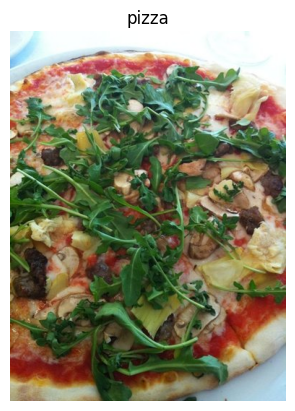

In [9]:
#View a random img from training dataset
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza"
                     )

In [10]:
img

array([[[216, 236, 243],
        [216, 236, 243],
        [217, 237, 244],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[217, 237, 244],
        [217, 237, 244],
        [217, 237, 244],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[218, 238, 245],
        [217, 237, 244],
        [216, 236, 243],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[165, 160, 128],
        [170, 165, 133],
        [173, 167, 135],
        ...,
        [177, 215, 238],
        [175, 213, 236],
        [174, 212, 235]],

       [[162, 159, 128],
        [167, 164, 131],
        [170, 165, 133],
        ...,
        [176, 214, 237],
        [174, 212, 235],
        [173, 211, 234]],

       [[164, 161, 130],
        [167, 164, 133],
        [168, 163, 131],
        ...,
        [176, 214, 237],
        [174, 212, 235],
        [173, 211, 234]]

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[216, 236, 243],
        [216, 236, 243],
        [217, 237, 244],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[217, 237, 244],
        [217, 237, 244],
        [217, 237, 244],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[218, 238, 245],
        [217, 237, 244],
        [216, 236, 243],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[165, 160, 128],
        [170, 165, 133],
        [173, 167, 135],
        ...,
        [177, 215, 238],
        [175, 213, 236],
        [174, 212, 235]],

       [[162, 159, 128],
        [167, 164, 131],
        [170, 165, 133],
        ...,
        [176, 214, 237],
        [174, 212, 235],
        [173, 211, 234]],

       [[164, 161, 130],
        [167, 164, 133],
        [168, 163, 131],
        ...,
        [176, 214, 23

In [12]:
#View img shape
img.shape

(512, 382, 3)

In [13]:
##Get all pixels values btw 0-1
img/255

array([[[0.84705882, 0.9254902 , 0.95294118],
        [0.84705882, 0.9254902 , 0.95294118],
        [0.85098039, 0.92941176, 0.95686275],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.85098039, 0.92941176, 0.95686275],
        [0.85098039, 0.92941176, 0.95686275],
        [0.85098039, 0.92941176, 0.95686275],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.85490196, 0.93333333, 0.96078431],
        [0.85098039, 0.92941176, 0.95686275],
        [0.84705882, 0.9254902 , 0.95294118],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.64705882, 0.62745098, 0.50196078],
        [0.66666667, 0.64705882, 0.52156863],
        [0.67843137, 0

## An end to end example
Let's build a CNN to find patterns in our images, more specifically we need a way to:
* Load our imgs
* Preprocess our imgs
* Build a CNN to find patterns in our imgs
* Compile our imgs
* Fit our CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Set seed
tf.random.set_seed(42)
#Preprocess the data
train_datagen=ImageDataGenerator(1./255)
valid_datagen=ImageDataGenerator(1./255)
#Setup path to our directories
train_dir="pizza_steak/train"
test_dir="pizza_steak/test"
#Importing data from directories and turn it into batches
train_data=train_datagen.flow_from_directory( 
                                       directory=train_dir, #Create feature and label automatically
                                       batch_size=32,
                                       target_size=(224,224),
                                       class_mode="binary",
                                       seed=42
                                      )
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                            batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42
                                            )
#Build a CNN
model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224,224,3)
    ),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"
                             ),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
#Compile
model_1.compile(
 loss=tf.keras.losses.BinaryCrossentropy(),
 optimizer=tf.keras.optimizers.Adam(),
 metrics=["accuracy"]   
)
#Fit
history_1=model_1.fit(train_data,epochs=5,
                     steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)
                     
                     )





Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


C:\Users\Mudit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/5
47/47 [==============================] - 30s 259ms/step - loss: 4.1327 - accuracy: 0.5347 - val_loss: 0.7164 - val_accuracy: 0.5840
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.5414 - accuracy: 0.7420 - val_loss: 0.6204 - val_accuracy: 0.6900
Epoch 3/5
47/47 [==============================] - 7s 152ms/step - loss: 0.3611 - accuracy: 0.8447 - val_loss: 0.6102 - val_accuracy: 0.7400
Epoch 4/5
47/47 [==============================] - 7s 156ms/step - loss: 0.2557 - accuracy: 0.9087 - val_loss: 0.6031 - val_accuracy: 0.7540
Epoch 5/5
47/47 [==============================] - 7s 146ms/step - loss: 0.1541 - accuracy: 0.9467 - val_loss: 0.6597 - val_accuracy: 0.7500


In [15]:
#Model  Summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before
Let's replicate the model used in previous chapter

In [16]:
#Set random seed
tf.random.set_seed(42)
#Create replicated model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_2.compile(
 loss=tf.keras.losses.CategoricalCrossentropy(),
 optimizer=tf.keras.optimizers.Adam(),
 metrics=["accuracy"]
)
history_2=model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data)
                      ,validation_data=valid_data,
                       validation_steps=len(valid_data)
                     )

Epoch 1/5
47/47 [==============================] - 8s 162ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 168ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 161ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 134ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000


In [17]:
#Model 2 summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1),model_2 performs terribly

In [18]:
#seed
tf.random.set_seed(42)
#create model
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
#Compile the model
model_3.compile(
 loss=tf.keras.losses.BinaryCrossentropy(),
 optimizer=tf.keras.optimizers.Adam(),
 metrics=["accuracy"]
)
history_3=model_3.fit(train_data,epochs=5,
                     steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                      validation_steps=len(valid_data)
                     )

Epoch 1/5
47/47 [==============================] - 8s 146ms/step - loss: 894.1954 - accuracy: 0.6160 - val_loss: 185.5367 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 6s 136ms/step - loss: 233.5427 - accuracy: 0.6640 - val_loss: 98.4896 - val_accuracy: 0.7240
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 181.3811 - accuracy: 0.6813 - val_loss: 144.4867 - val_accuracy: 0.6240
Epoch 4/5
47/47 [==============================] - 7s 147ms/step - loss: 93.4303 - accuracy: 0.7027 - val_loss: 148.4932 - val_accuracy: 0.6200
Epoch 5/5
47/47 [==============================] - 8s 165ms/step - loss: 90.6870 - accuracy: 0.7080 - val_loss: 42.1679 - val_accuracy: 0.7260


In [19]:
#Summary of model 3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**Note**: You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different **features** in an image.

In [20]:
print(tf.__version__)

2.10.0


## Binary Classification :
1. Become one with data (visualize*3)
2. Preprocess the data (prepared it for our model , main step is scaling/Normalization, turn them into batches)
3. Create a model (start  with a baseline)
4. Fit the model
5. Evaluate
6. Tweaking model, adjust  parameters
7. Repeat till satisfied

### 1. Become one with data

['368170.jpg']
Image shape:(384, 512, 3)


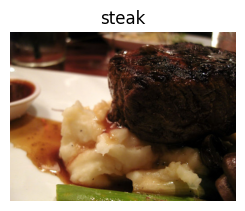

In [21]:
#Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")


['2621534.jpg']
Image shape:(512, 512, 3)


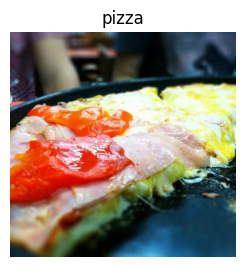

In [22]:
plt.subplot(1,2,1)
pizza_img=view_random_image("pizza_steak/train/","pizza")

## 2. Preprocess the data (prepare it for the model)

In [23]:
## Define the datatset paths
train_dir= "pizza_steak/train/"
test_dir="pizza_steak/test/"

Our next step is to turn our data into **batches** 
A batch is small subset of data. Rather than look at all - 10,000 images at 
one time, a model might only look at 32 at a time.
It does this for couple of reasons:
1. Memory cant hold many images at a time
2. Learning patterns from 10,000 imgs ,algo might puke

In [24]:
!nvidia-smi

Sun Jan  1 14:51:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.56       Driver Version: 527.56       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   60C    P8     3W /  50W |   3876MiB /  4096MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of train data batch
images ,labels=train_data.next() # get "next" batch of imgs/labels
len(images),len(labels)

(32, 32)

In [28]:
#How many batches
len(train_data)

47

In [29]:
#Get first 2 images
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [30]:
images[7].shape

(224, 224, 3)

In [31]:
#View first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## 3. Create a CNN model (start with baseline)

In [32]:
# Make the creating of our model easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [33]:
# Create the model ( baseline with 3 layers CNN)
model_4=Sequential([
    Conv2D(filters=10,# No of sliding windows going across input(more=complex)
           kernel_size=3,# size of sliding window going across input
           padding="valid", # If valid output shape gets compressed, if "same" then output shape = input shape
           activation="relu",
           input_shape=(224,224,3),  # Input layer (specify input shape)
           strides=1 # size of step the sliding window takes across input
          ),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") #Output layer (Binary  )
    
])  

In [34]:
# Compile the model
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [35]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## 4. Fit the model

In [36]:
# check lengths of training and test data
len(train_data),len(test_data)

(47, 16)

In [37]:
#Fit the model
history_4=model_4.fit(train_data, # It's combination of X and y
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 10s 185ms/step - loss: 2.0576 - accuracy: 0.6533 - val_loss: 0.5308 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.4782 - accuracy: 0.7840 - val_loss: 0.3998 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4209 - accuracy: 0.8140 - val_loss: 0.3821 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 8s 174ms/step - loss: 0.3742 - accuracy: 0.8427 - val_loss: 0.3676 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 9s 180ms/step - loss: 0.2699 - accuracy: 0.8987 - val_loss: 0.3711 - val_accuracy: 0.8300


In [38]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 125ms/step - loss: 0.3711 - accuracy: 0.8300


[0.3711121082305908, 0.8299999833106995]

In [39]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 130ms/step - loss: 0.6854 - accuracy: 0.5020


[0.6853556036949158, 0.5019999742507935]

## 5. Evaluate the model
It looks like model is learning something ,let's evaluate it.


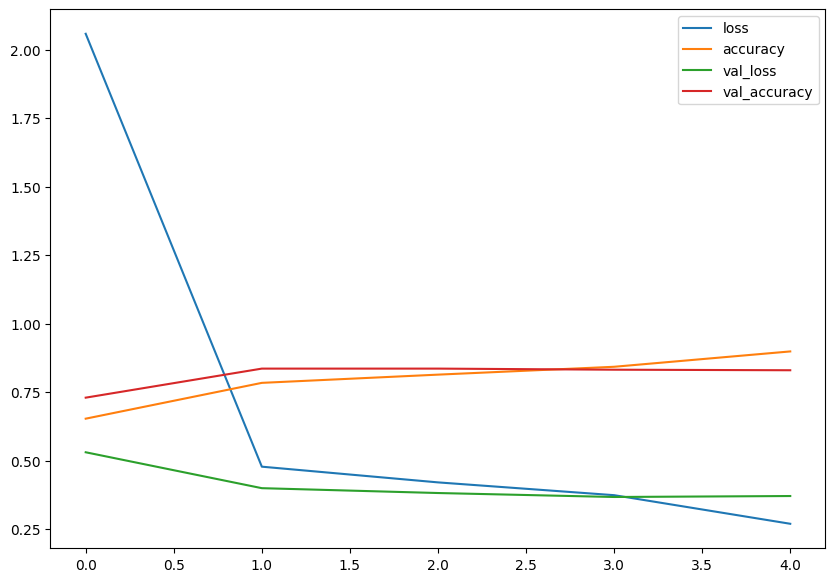

In [40]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [41]:
#Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

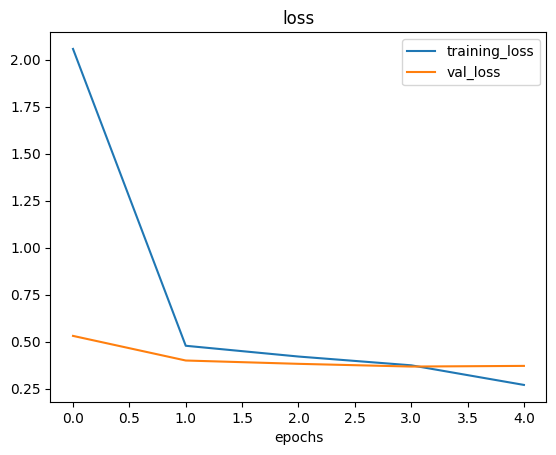

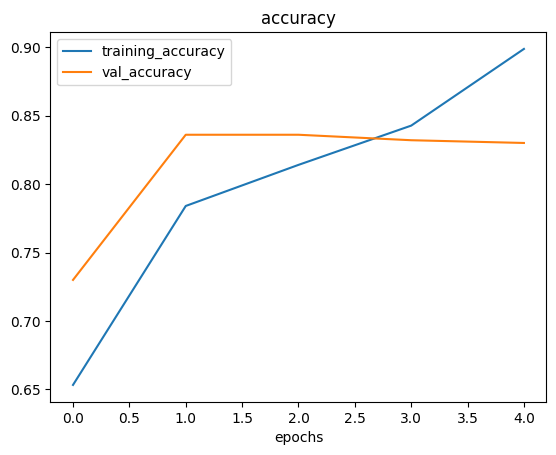

In [42]:
# Check out loss and accuracy of model 4
plot_loss_curves(history_4)

### **Note** : 
when a model's **validation loss starts to increase**,it's likely that model is **overfitting** the training dataset. This means, it's learning the pattern in the training dataset too *well* and thus the model's ability to generalize to unseen data will be dimished.

## 6. Adjust  model parameters
Fitting a machine learning model comes in 3 steps:
0. Create a base line
1. Beat the base line by overfitting a larger model
2. Reduce overfitting
 
Ways to induce overfitting:
* Increase the no of conv layers
* Increase number of conv filters
* Add another dense layer to output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data

In [43]:
#Create the model (this is our new baseline)
model_5=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
    
])

In [44]:
#Compile the model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [45]:
#Fit 
hisotry_5=model_5.fit(train_data,epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data)
                      )

Epoch 1/5
47/47 [==============================] - 13s 231ms/step - loss: 0.6284 - accuracy: 0.6660 - val_loss: 0.5422 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4936 - accuracy: 0.7727 - val_loss: 0.3792 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 9s 181ms/step - loss: 0.4221 - accuracy: 0.8113 - val_loss: 0.3907 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3995 - accuracy: 0.8260 - val_loss: 0.3958 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3818 - accuracy: 0.8407 - val_loss: 0.3462 - val_accuracy: 0.8520


In [46]:
#Get a summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [47]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


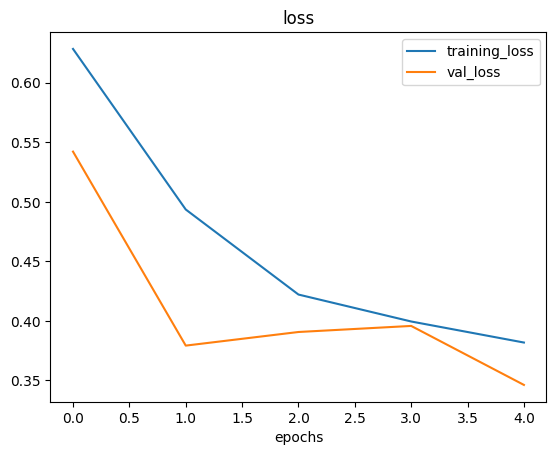

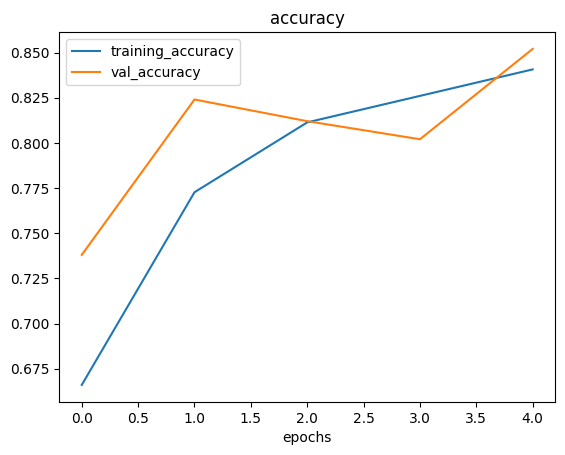

In [48]:
#plot loss curves
plot_loss_curves(hisotry_5)

In [49]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

### Opening our bag of tricks and finding data augmentation

In [50]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True
                                          )

#Create ImagaDataGenerator without data augmentation
train_datagen=ImageDataGenerator(rescale=1/255.)
#Create ImagaDataGenerator without data augmentation for test dataset
test_datagen=ImageDataGenerator(rescale=1/255.)

### What is data augmentation:
Data augmentation is the process of altering our training data , leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the roattion of an image, flipping it,cropping it or something similar.

In [51]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented=train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                target_size=(224,224),
                                                                batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=False #For demonstration purposes only
                                                                )
#Create non-augmented train data batches
print("Non-Augmented training data:")
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                             class_mode="binary",
                                             shuffle=False
                                            )

IMG_SIZE=(224,224)
#Create non-augmented test data batches
print("Non-augmented test data:")
test_data=test_datagen.flow_from_directory(test_dir,
                                          target_size=IMG_SIZE,
                                          batch_size=32,
                                          class_mode="binary",
                                          )

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


### Note :  
  Data augmentation only happens on **training data**

In [52]:
# Get sample augmented data batches
images,labels=train_data.next()
augmented_images,augmented_labels=train_data_augmented.next()

showing image number:5


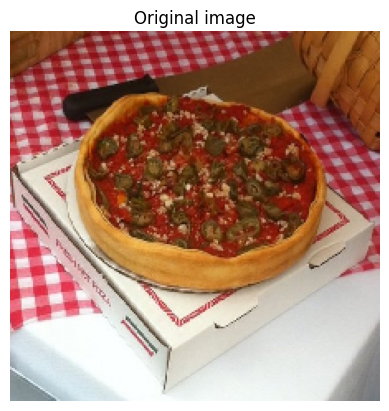

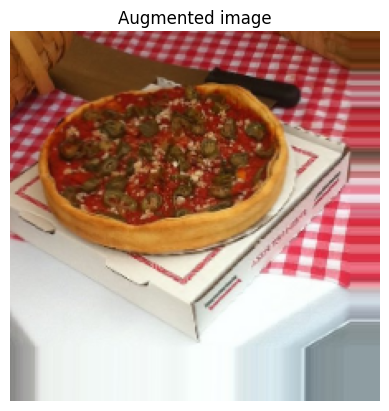

In [53]:
#Show original and augmented image
import random
random_number=random.randint(0,32)
print(f"showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [54]:
#building model with augmented trai data
model_6=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [55]:
#Compile
model_6.compile(
  loss=tf.keras.losses.BinaryCrossentropy(),
  optimizer=Adam(),
  metrics=["accuracy"]  
)

In [56]:
#Fit
history_6=model_6.fit(train_data_augmented,epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data)
                     )

Epoch 1/5
47/47 [==============================] - 32s 666ms/step - loss: 0.7614 - accuracy: 0.5173 - val_loss: 0.6933 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 26s 556ms/step - loss: 0.6929 - accuracy: 0.4993 - val_loss: 0.6914 - val_accuracy: 0.5020
Epoch 3/5
47/47 [==============================] - 28s 603ms/step - loss: 0.6955 - accuracy: 0.4920 - val_loss: 0.6897 - val_accuracy: 0.5020
Epoch 4/5
47/47 [==============================] - 28s 601ms/step - loss: 0.6907 - accuracy: 0.5147 - val_loss: 0.6870 - val_accuracy: 0.5020
Epoch 5/5
47/47 [==============================] - 23s 499ms/step - loss: 0.6928 - accuracy: 0.5027 - val_loss: 0.6815 - val_accuracy: 0.5300


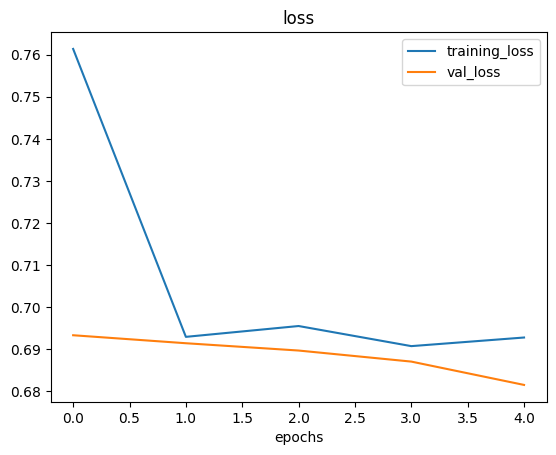

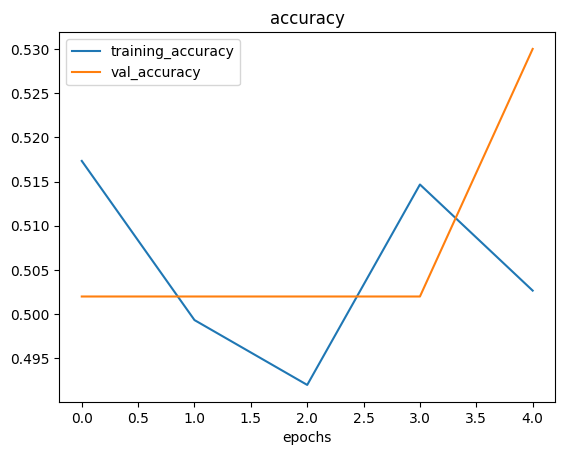

In [57]:
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model(same as before) on it and see what happens

In [58]:
#Import data and augment it and shuffle from training directory
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                          target_size=(224,224),
                                                                          batch_size=32,
                                                                          class_mode="binary",
                                                                          shuffle=True
                                                                         )

Found 1500 images belonging to 2 classes.


In [59]:
# Create the model (same as model 5 and model 6)
model_7=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])
#COmpile
model_7.compile(
 loss=tf.keras.losses.BinaryCrossentropy(),
 optimizer=Adam(),
 metrics=["accuracy"]   
)
#Fit
history_7=model_7.fit(train_data_augmented_shuffled,epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data)
                     )

Epoch 1/5
47/47 [==============================] - 24s 504ms/step - loss: 0.6455 - accuracy: 0.6187 - val_loss: 0.4812 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 24s 508ms/step - loss: 0.5407 - accuracy: 0.7187 - val_loss: 0.4191 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 25s 520ms/step - loss: 0.4925 - accuracy: 0.7780 - val_loss: 0.4207 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 24s 501ms/step - loss: 0.4758 - accuracy: 0.7647 - val_loss: 0.3322 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 24s 505ms/step - loss: 0.4686 - accuracy: 0.7793 - val_loss: 0.3674 - val_accuracy: 0.8460


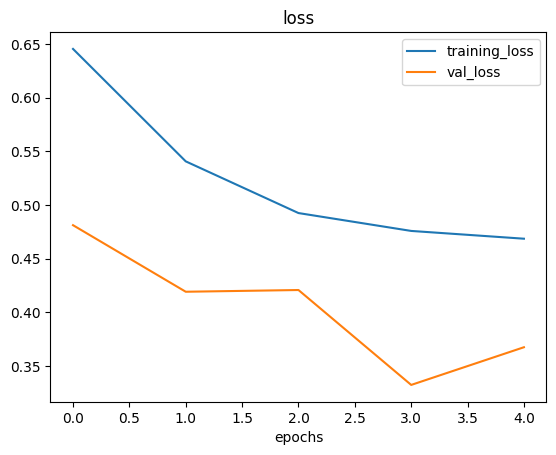

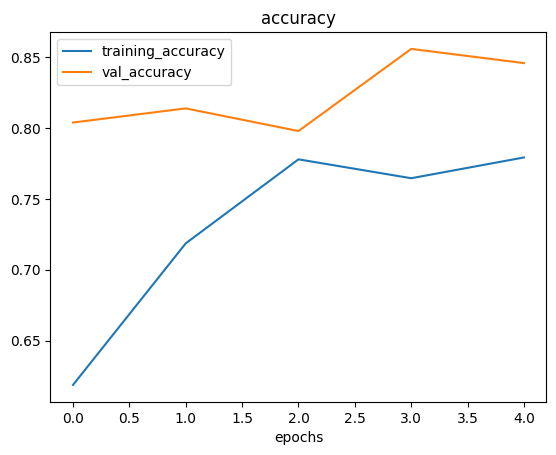

In [60]:
#Plot loss curves
plot_loss_curves(history_7)

## 7. Repeat until satisfied
Since we have already beaten our baseline , there are few things we could try to continue to improve our
model:
* Increase the no of model layers (add more Conv/Max layers)
* Increase the no of filters in each conv layers (from 10 to 32 or  even 64)
* Train for longer
* Find Ideal learning rate
* Get more data
* Use Transfer learning 

In [61]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [62]:
Prac_model_1=Sequential([
    Conv2D(32,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(32,3,activation="relu"),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [63]:
Prac_model_1.compile(
loss=tf.keras.losses.BinaryCrossentropy(),
optimizer=Adam(),
metrics=["accuracy"]    
)

In [64]:
Prac_history_1=Prac_model_1.fit(train_data_augmented_shuffled,
                               epochs=20,
                            steps_per_epoch=len(train_data_augmented_shuffled),
                               validation_data=test_data,
                               validation_steps=len(test_data) 
                               )

Epoch 1/20
47/47 [==============================] - 30s 576ms/step - loss: 0.7173 - accuracy: 0.5787 - val_loss: 0.6485 - val_accuracy: 0.6260
Epoch 2/20
47/47 [==============================] - 26s 562ms/step - loss: 0.6113 - accuracy: 0.6813 - val_loss: 0.4892 - val_accuracy: 0.7580
Epoch 3/20
47/47 [==============================] - 25s 534ms/step - loss: 0.5293 - accuracy: 0.7480 - val_loss: 0.4153 - val_accuracy: 0.8220
Epoch 4/20
47/47 [==============================] - 26s 549ms/step - loss: 0.5028 - accuracy: 0.7527 - val_loss: 0.4146 - val_accuracy: 0.8180
Epoch 5/20
47/47 [==============================] - 26s 555ms/step - loss: 0.5061 - accuracy: 0.7633 - val_loss: 0.3559 - val_accuracy: 0.8480
Epoch 6/20
47/47 [==============================] - 26s 562ms/step - loss: 0.4758 - accuracy: 0.7820 - val_loss: 0.4360 - val_accuracy: 0.8000
Epoch 7/20
47/47 [==============================] - 27s 582ms/step - loss: 0.5381 - accuracy: 0.7587 - val_loss: 0.4441 - val_accuracy: 0.8120

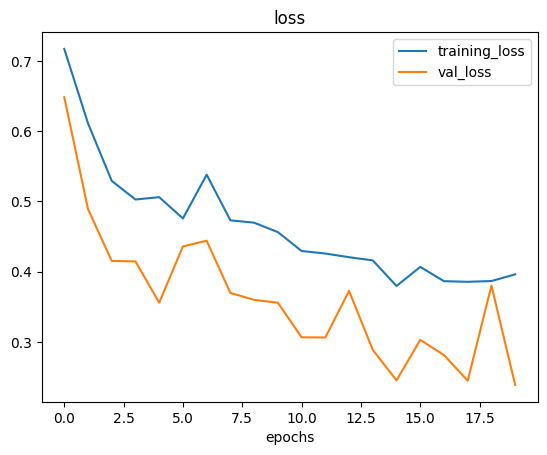

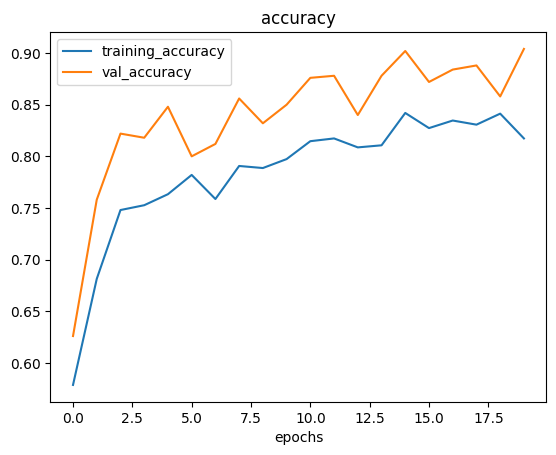

In [65]:
plot_loss_curves(Prac_history_1)

In [66]:
Prac_model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                 

### Making a prediction with our trained model on our own custom data

In [67]:
#Classes we're working with
print(class_names)

['pizza' 'steak']


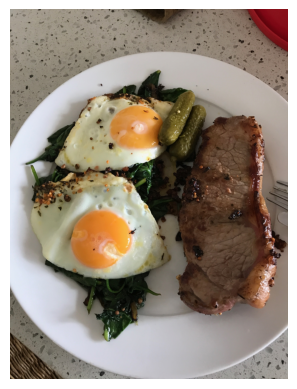

In [68]:
#View our example image
import matplotlib.image as mpimg
steak=mpimg.imread("03-steak.jpeg")   
plt.imshow(steak)
plt.axis(False);

In [69]:
#Check the shape
steak.shape

(4032, 3024, 3)

In [70]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [71]:
steak.shape

(4032, 3024, 3)

In [72]:
model_7.predict(steak)

ValueError: in user code:

    File "C:\Users\Mudit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Mudit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Mudit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Mudit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\Mudit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Mudit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 3024, 3)


In [73]:
tf.expand_dims(steak,axis=0).shape

TensorShape([1, 4032, 3024, 3])

In [74]:
expanded_steak=tf.expand_dims(steak,axis=0)

In [75]:
model_7.predict(expanded_steak)

ValueError: in user code:

    File "C:\Users\Mudit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Mudit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Mudit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Mudit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\Mudit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Mudit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 4032, 3024, 3)


### Note :
When you train a Neural network and you want to make a prediction with your own custom data, it's important that your custom data is preprocessed into same format  as your model was trained on

In [76]:
# Create a function to import image and resize it to be able to used with our model
def load_and_prep_image(filename,img_shape=224):
    """"
    Read an image from filename, turns it into tensor 
    and reshapes it to(img_shape,color_channels)
    """
    #Read in the image
    img=tf.io.read_file(filename)
    #Decode the read file into tensor
    img=tf.image.decode_image(img)
    #Resize the image
    img=tf.image.resize(img,size=[img_shape,img_shape])
    #Rescale the img ,normalization
    img=img/255.
    return img

In [77]:
#Load in and preprocess our custom image
steak=load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [78]:
pred=model_7.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 464ms/step


In [79]:
#remind ourself of class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [80]:
#We can index the predicted class by rounding the prediction probablity and indexing it on class name
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

In [81]:

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
     

1/1 [==============================] - 0s 38ms/step


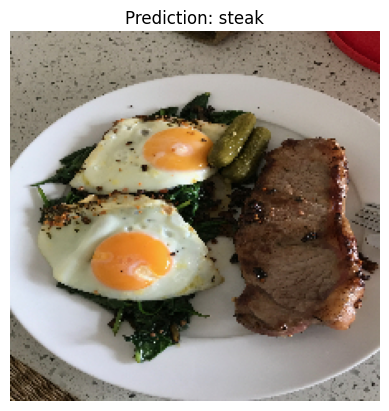

In [82]:
#Test our model on a custom image
pred_and_plot(model_7,"03-steak.jpeg",class_names)

1/1 [==============================] - 0s 22ms/step


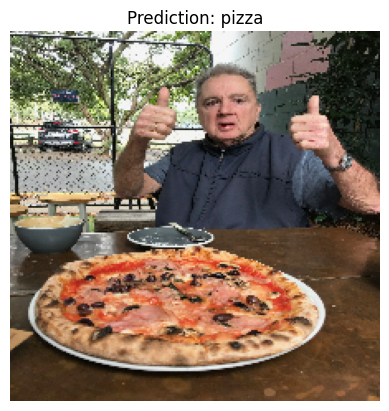

In [83]:
pred_and_plot(model_7,"03-pizza-dad.jpeg",class_names)

## Multi-class Image CLassification

## 1. Import and become one with data

In [84]:
import zipfile

#Unzip
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

In [85]:
import os
#walk through 10 classes of food image data
for dirpath,dirnames,filesnames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}. ")

There are 2 directories and 750 images in 10_food_classes_all_data. 
There are 10 directories and 750 images in 10_food_classes_all_data\test. 
There are 0 directories and 750 images in 10_food_classes_all_data\test\chicken_curry. 
There are 0 directories and 750 images in 10_food_classes_all_data\test\chicken_wings. 
There are 0 directories and 750 images in 10_food_classes_all_data\test\fried_rice. 
There are 0 directories and 750 images in 10_food_classes_all_data\test\grilled_salmon. 
There are 0 directories and 750 images in 10_food_classes_all_data\test\hamburger. 
There are 0 directories and 750 images in 10_food_classes_all_data\test\ice_cream. 
There are 0 directories and 750 images in 10_food_classes_all_data\test\pizza. 
There are 0 directories and 750 images in 10_food_classes_all_data\test\ramen. 
There are 0 directories and 750 images in 10_food_classes_all_data\test\steak. 
There are 0 directories and 750 images in 10_food_classes_all_data\test\sushi. 
There are 10 direc

In [86]:
#Setuo the train and test directories
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [87]:
#Let's get class names
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['224718.jpg']
Image shape:(382, 512, 3)


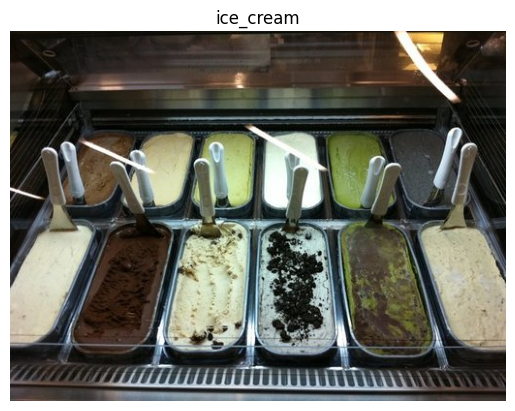

In [88]:
#Visualize
import random
img=view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for model)

In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_augmented_datagen=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           zoom_range=0.2,
                                           shear_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True     
                                          )
test_data_datagen=ImageDataGenerator(rescale=1/255.)

In [90]:
train_augmented_data=train_data_augmented_datagen.flow_from_directory(directory=train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode="categorical"
                                                                     )
test_data=test_data_datagen.flow_from_directory(directory=test_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode="categorical"
                                               )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create model

In [91]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [92]:
#Create model
model_8=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
    
])

In [93]:
#Compile model
model_8.compile(
 loss=tf.keras.losses.CategoricalCrossentropy(),
 optimizer=Adam(),
 metrics=["accuracy"]   
)

In [94]:
#Fit the model
history_8=model_8.fit(train_augmented_data,epochs=6,
                     steps_per_epoch=len(train_augmented_data),
                      validation_data=test_data,
                      validation_steps=(len(test_data))
                     )

Epoch 1/6
235/235 [==============================] - 166s 703ms/step - loss: 2.1753 - accuracy: 0.2028 - val_loss: 1.9727 - val_accuracy: 0.3012
Epoch 2/6
235/235 [==============================] - 146s 620ms/step - loss: 2.0279 - accuracy: 0.2848 - val_loss: 1.8419 - val_accuracy: 0.3556
Epoch 3/6
235/235 [==============================] - 127s 540ms/step - loss: 1.9766 - accuracy: 0.3059 - val_loss: 1.9138 - val_accuracy: 0.3376
Epoch 4/6
235/235 [==============================] - 148s 631ms/step - loss: 1.9338 - accuracy: 0.3261 - val_loss: 1.7824 - val_accuracy: 0.3760
Epoch 5/6
235/235 [==============================] - 144s 610ms/step - loss: 1.8956 - accuracy: 0.3483 - val_loss: 1.7775 - val_accuracy: 0.3788
Epoch 6/6
235/235 [==============================] - 125s 530ms/step - loss: 1.8806 - accuracy: 0.3565 - val_loss: 1.7178 - val_accuracy: 0.4120


In [95]:
## 5. Evaluate the model
model_8.evaluate(test_data)

79/79 [==============================] - 7s 90ms/step - loss: 1.7178 - accuracy: 0.4120


[1.717815637588501, 0.41200000047683716]

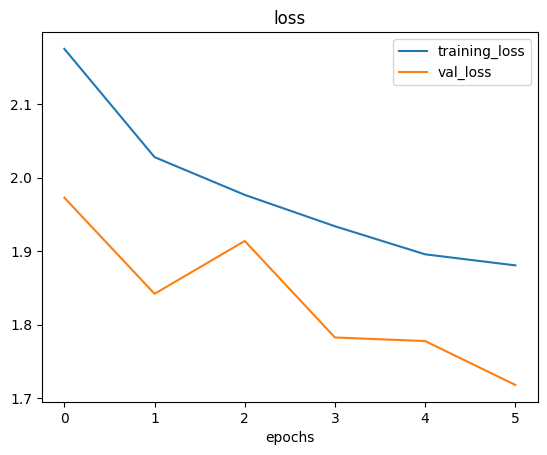

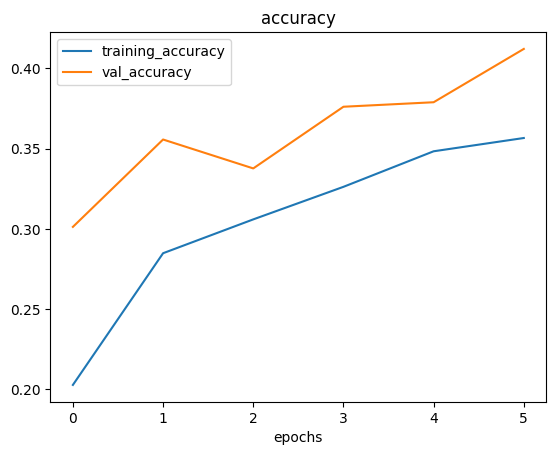

In [96]:
#Check out  model loss curve
plot_loss_curves(history_8)

In [97]:
#Model 10
model_10=tf.keras.models.clone_model(model_8)

In [98]:
#Compile model
model_10.compile(
 loss=tf.keras.losses.CategoricalCrossentropy(),
 optimizer=Adam(),
 metrics=["accuracy"]   
)

In [99]:
#Fit the model
history_10=model_10.fit(train_augmented_data,epochs=6,
                     steps_per_epoch=len(train_augmented_data),
                      validation_data=test_data,
                      validation_steps=(len(test_data))
                     )

Epoch 1/6
235/235 [==============================] - 110s 464ms/step - loss: 2.2737 - accuracy: 0.1648 - val_loss: 2.0886 - val_accuracy: 0.2584
Epoch 2/6
235/235 [==============================] - 123s 523ms/step - loss: 2.1247 - accuracy: 0.2307 - val_loss: 1.9811 - val_accuracy: 0.2964
Epoch 3/6
235/235 [==============================] - 132s 563ms/step - loss: 2.0701 - accuracy: 0.2633 - val_loss: 1.9484 - val_accuracy: 0.3292
Epoch 4/6
235/235 [==============================] - 136s 580ms/step - loss: 2.0285 - accuracy: 0.2820 - val_loss: 1.8928 - val_accuracy: 0.3496
Epoch 5/6
235/235 [==============================] - 143s 608ms/step - loss: 1.9933 - accuracy: 0.2973 - val_loss: 1.8293 - val_accuracy: 0.3728
Epoch 6/6
235/235 [==============================] - 146s 620ms/step - loss: 1.9745 - accuracy: 0.3032 - val_loss: 1.8494 - val_accuracy: 0.3692


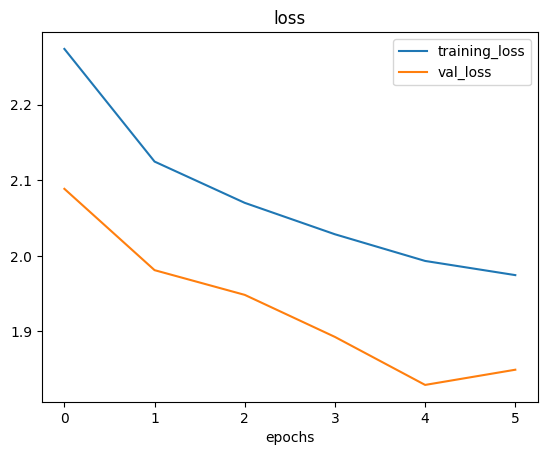

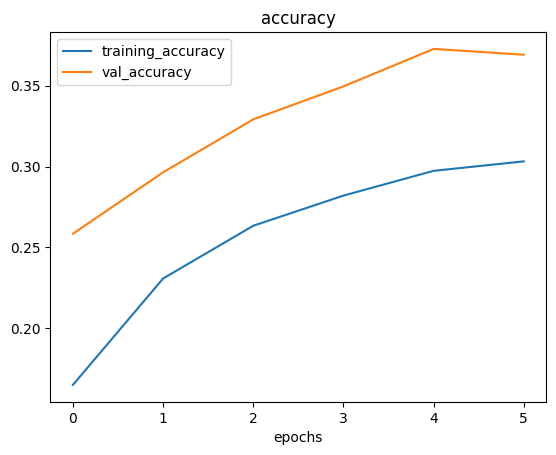

In [100]:
#Check out  model loss curve
plot_loss_curves(history_10)

In [101]:
model_10.evaluate(test_data)

79/79 [==============================] - 8s 95ms/step - loss: 1.8494 - accuracy: 0.3692


[1.8494105339050293, 0.3691999912261963]

In [102]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [110]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

## Making a prediction on our trained model

1/1 [==============================] - 0s 21ms/step


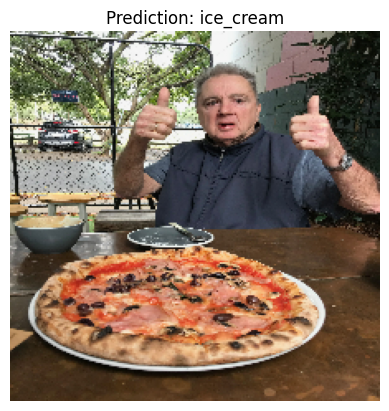

In [113]:
# Make a predction using model 8
pred_and_plot(model_8,"03-pizza-dad.jpeg",class_names)

### Model didnt perform well as it achive only 41% on test data

## Save and load our model

In [115]:
#Savel a model
model_8.save("Save_trained_model_8")

INFO:tensorflow:Assets written to: Save_trained_model_8\assets


INFO:tensorflow:Assets written to: Save_trained_model_8\assets


In [116]:
#Load in a trained model and evaluate 
loaded_model_8=tf.keras.models.load_model("Save_trained_model_8")
loaded_model_8.evaluate(test_data)

79/79 [==============================] - 10s 120ms/step - loss: 1.7178 - accuracy: 0.4120


[1.717815637588501, 0.41200000047683716]

In [117]:
#Compared our loaded model to exsisting model
model_8.evaluate(test_data)

79/79 [==============================] - 10s 128ms/step - loss: 1.7178 - accuracy: 0.4120


[1.7178159952163696, 0.41200000047683716]

In [118]:
0.41200000047683716==0.41200000047683716

True

## Excersise

## Ques : Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

In [119]:
model_11=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
    
])

In [121]:
model_11.compile(
 loss=tf.keras.losses.CategoricalCrossentropy(),
 optimizer=Adam(),
 metrics=["accuracy"]   
)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [122]:
history_11=model_11.fit(train_augmented_data,epochs=6,
                     steps_per_epoch=len(train_augmented_data),
                      validation_data=test_data,
                      validation_steps=(len(test_data)),
                      callbacks=[lr_scheduler]  
                     )

Epoch 1/6
235/235 [==============================] - 134s 569ms/step - loss: 2.2659 - accuracy: 0.1403 - val_loss: 2.1693 - val_accuracy: 0.2076 - lr: 1.0000e-04
Epoch 2/6
235/235 [==============================] - 152s 649ms/step - loss: 2.1128 - accuracy: 0.2380 - val_loss: 1.9756 - val_accuracy: 0.2892 - lr: 1.1220e-04
Epoch 3/6
235/235 [==============================] - 120s 511ms/step - loss: 2.0312 - accuracy: 0.2831 - val_loss: 1.8969 - val_accuracy: 0.3248 - lr: 1.2589e-04
Epoch 4/6
235/235 [==============================] - 144s 612ms/step - loss: 1.9991 - accuracy: 0.2968 - val_loss: 1.9546 - val_accuracy: 0.3264 - lr: 1.4125e-04
Epoch 5/6
235/235 [==============================] - 152s 645ms/step - loss: 1.9792 - accuracy: 0.3041 - val_loss: 1.8379 - val_accuracy: 0.3640 - lr: 1.5849e-04
Epoch 6/6
235/235 [==============================] - 135s 573ms/step - loss: 1.9529 - accuracy: 0.3204 - val_loss: 1.7651 - val_accuracy: 0.3948 - lr: 1.7783e-04


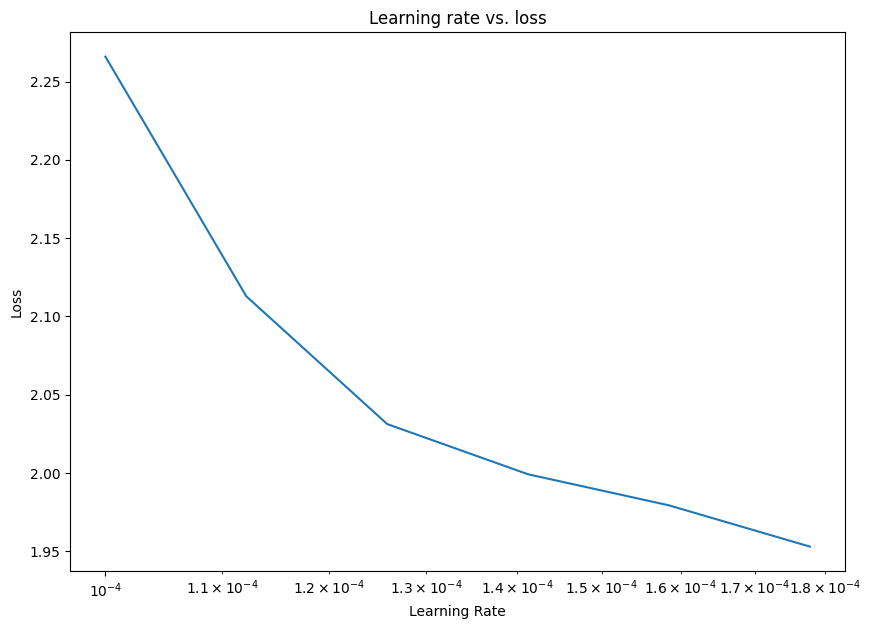

In [124]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(6)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_11.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");
     